In [1]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns 
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('../input/Dataset_spine.csv')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
Col1           310 non-null float64
Col2           310 non-null float64
Col3           310 non-null float64
Col4           310 non-null float64
Col5           310 non-null float64
Col6           310 non-null float64
Col7           310 non-null float64
Col8           310 non-null float64
Col9           310 non-null float64
Col10          310 non-null float64
Col11          310 non-null float64
Col12          310 non-null float64
Class_att      310 non-null object
Unnamed: 13    14 non-null object
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [40]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [41]:
data.drop("Unnamed: 13" , axis = 1 , inplace = True)

In [42]:
data['Class_att'] = [ 1 if Class_att == 'Abnormal' else 0 for Class_att  in data.Class_att]

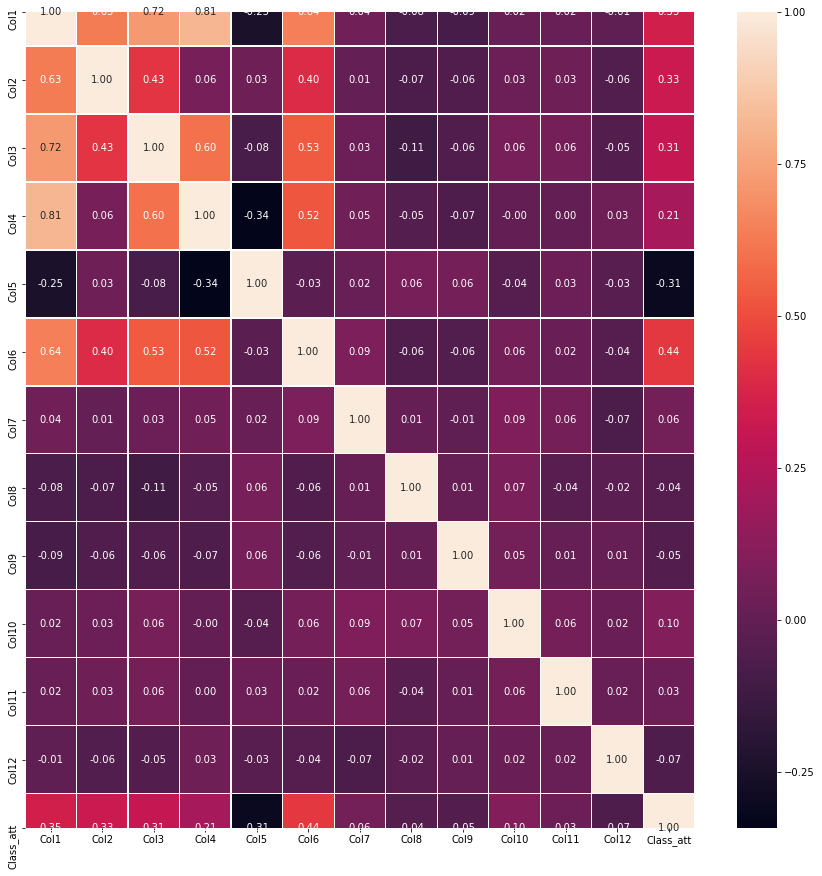

In [43]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr() , annot =True , linewidths = .3 , fmt = "1.2f")
plt.show()

In [44]:
#sns.pairplot(data = data , hue = 'Class_att')

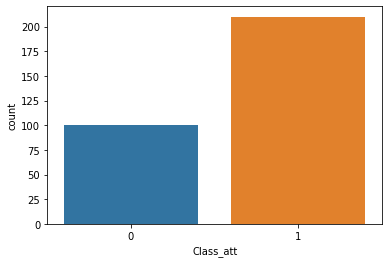

In [45]:
sns.countplot(x= 'Class_att' , data = data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003460B54B48>,
      dtype=object)

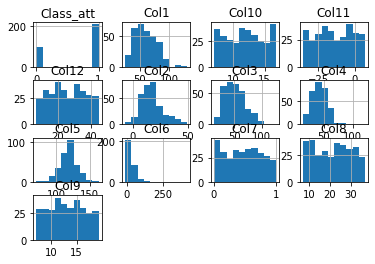

In [46]:
data.hist()

In [47]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [48]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=47)

                                                Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,auc

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [53]:
cvs = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)

print(cvs)
print(50*"*")
print(cvs.mean())



[0.86956522 0.81818182 0.77272727 0.81818182 0.68181818 0.68181818
 0.95238095 0.85714286 0.9047619  0.80952381]
**************************************************
0.8166102013928102


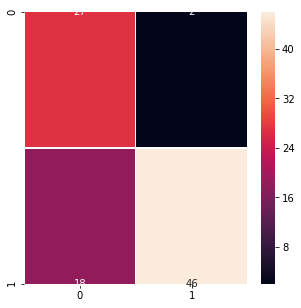

              precision    recall  f1-score   support

           0       0.60      0.93      0.73        29
           1       0.96      0.72      0.82        64

    accuracy                           0.78        93
   macro avg       0.78      0.82      0.78        93
weighted avg       0.85      0.78      0.79        93



In [54]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=.3)
plt.show()

print(classification_report(y_test,y_pred))

c:\users\admin\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


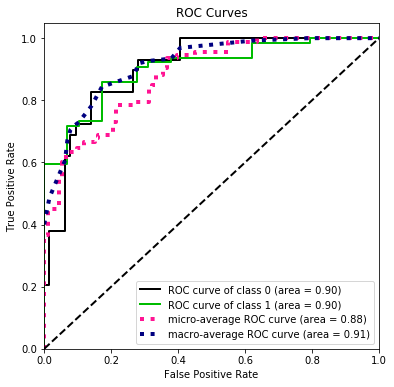

Auc Score: 0.8248922413793103


In [55]:
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, lr.predict_proba(X_test),figsize=(6,6))
plt.show()

print("Auc Score: {}".format(roc_auc_score(y_test,y_pred)))

                                                               KNN

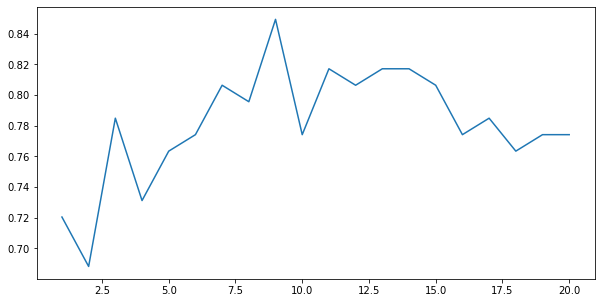

In [56]:
from sklearn.neighbors import KNeighborsClassifier

l = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors  = i)
    knn.fit(X_train,y_train)
    l.append(knn.score(X_test,y_test))

plt.figure(figsize=(10,5))    
sns.lineplot(x = range(1,21), y = l)
plt.show()

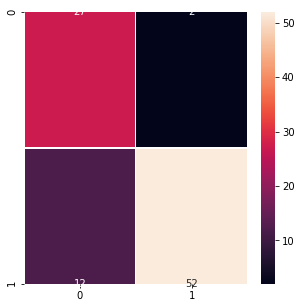

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        29
           1       0.96      0.81      0.88        64

    accuracy                           0.85        93
   macro avg       0.83      0.87      0.84        93
weighted avg       0.88      0.85      0.85        93



In [57]:
knn = KNeighborsClassifier(n_neighbors  = 9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=.3)
plt.show()

print(classification_report(y_test,y_pred))

                                                            svm

In [58]:
from sklearn.svm import SVC

l = []
for i in ["linear","poly","rbf"]:
    svc = SVC(kernel = i)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    
    l.append(y_pred)


print("Linear score {}".format(classification_report(y_test,l[0])))
print("Poly score {}".format(classification_report(y_test,l[1])))
print("Rbf score {}".format(classification_report(y_test,l[2])))

Linear score               precision    recall  f1-score   support

           0       0.65      0.90      0.75        29
           1       0.94      0.78      0.85        64

    accuracy                           0.82        93
   macro avg       0.80      0.84      0.80        93
weighted avg       0.85      0.82      0.82        93

Poly score               precision    recall  f1-score   support

           0       0.62      0.90      0.73        29
           1       0.94      0.75      0.83        64

    accuracy                           0.80        93
   macro avg       0.78      0.82      0.78        93
weighted avg       0.84      0.80      0.80        93

Rbf score               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.69      1.00      0.82        64

    accuracy                           0.69        93
   macro avg       0.34      0.50      0.41        93
weighted avg       0.47      0.69      0

In [59]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.97      0.69        29
           1       0.98      0.62      0.76        64

    accuracy                           0.73        93
   macro avg       0.76      0.80      0.73        93
weighted avg       0.84      0.73      0.74        93



                                                  Decison Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

dt_cv =RandomizedSearchCV(estimator = dt,param_distributions=param_dist)
dt_cv.fit(X_train,y_train)
    
print(dt_cv.best_params_)
print(dt_cv.best_score_)

{'min_samples_leaf': 7, 'max_features': 4, 'max_depth': 3, 'criterion': 'entropy'}
0.8202764976958525


c:\users\admin\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=  3,max_features=4,min_samples_leaf=7)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        29
           1       0.88      0.83      0.85        64

    accuracy                           0.81        93
   macro avg       0.77      0.79      0.78        93
weighted avg       0.82      0.81      0.81        93



                                                    RandomForest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

l = ["gini","entropy"]

grid = {"criterion":l,"n_estimators":range(1,20)}

rf = RandomForestClassifier()

rf_cv = GridSearchCV(estimator = rf , param_grid = grid , cv = 10)
rf_cv.fit(X_train,y_train)

print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'criterion': 'entropy', 'n_estimators': 11}
0.8433179723502304


c:\users\admin\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


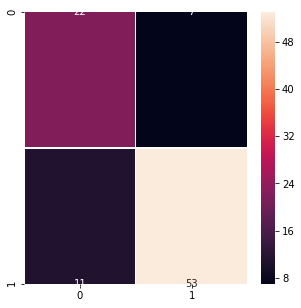

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        29
           1       0.88      0.83      0.85        64

    accuracy                           0.81        93
   macro avg       0.77      0.79      0.78        93
weighted avg       0.82      0.81      0.81        93

0.8064516129032258


In [63]:
rf = RandomForestClassifier(criterion="entropy",n_estimators = 11)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=.3)
plt.show()

print(classification_report(y_test,y_pred))
print(rf.score(X_test,y_test))